In [28]:
# Imports for machine learning model

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [29]:
#Skeleton for our model

# Load the data
file_path = Path('./Resources/Machine Learning Features.csv')
df = pd.read_csv(file_path)

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()


In [30]:
df.head()

,Unnamed: 0,AnalysisNeighborhood,AvgHomeCost,CS Score,the_geom,PTrans_Sco,Trans_Sco,VCrim_Rate,LivAl_Per,EldLivAl_Per,Viol_Rate,Emp_per,Ec_Score,Pov_Per,PopDens,DayPopDens,Res_Score
0,0,Bayview,349602.14105,7.649667,MULTIPOLYGON (((-122.38903499954088 37.7329189...,13.758,1.0,105.799,0.224654,0.073887,7.78,0.838265,1.0,0.413469,6944.77,9850.25,1.0
1,1,Bayview,349602.14105,7.649667,MULTIPOLYGON (((-122.38155800020716 37.7381230...,13.758,1.0,105.799,0.224654,0.073887,7.78,0.838265,1.0,0.413469,6944.77,9850.25,1.0
2,2,Bayview,349602.14105,7.649667,MULTIPOLYGON (((-122.39262499954708 37.7292780...,13.758,1.0,105.799,0.224654,0.073887,7.78,0.838265,1.0,0.413469,6944.77,9850.25,1.0
3,3,Bayview,349602.14105,7.649667,MULTIPOLYGON (((-122.38451700015729 37.7228620...,13.758,1.0,105.799,0.224654,0.073887,7.78,0.838265,1.0,0.413469,6944.77,9850.25,1.0
4,4,Bayview,349602.14105,7.649667,MULTIPOLYGON (((-122.39594499999093 37.7377840...,13.758,1.0,105.799,0.224654,0.073887,7.78,0.838265,1.0,0.413469,6944.77,9850.25,1.0


In [31]:
#drop columns that wont be used
df = df.drop(columns = ['the_geom'])

#drop duplicate neighborhoods
df = df.drop_duplicates(subset=['AnalysisNeighborhood'])

In [32]:
df

,Unnamed: 0,AnalysisNeighborhood,AvgHomeCost,CS Score,PTrans_Sco,Trans_Sco,VCrim_Rate,LivAl_Per,EldLivAl_Per,Viol_Rate,Emp_per,Ec_Score,Pov_Per,PopDens,DayPopDens,Res_Score
0,0,Bayview,3.496021e+05,7.649667,13.75800,1.0,105.7990,0.224654,0.073887,7.78,0.838265,1.0,0.413469,6944.77,9850.25,1.0
11,11,Bernal Heights,4.817842e+05,7.607590,28.68320,3.0,43.7684,0.243070,0.050114,6.90,0.927948,3.0,0.242756,22066.80,16503.80,3.0
17,17,Castro/Upper Market,8.034330e+05,7.382333,36.85040,4.0,64.1234,0.428756,0.077243,9.34,0.930183,4.0,0.161876,23023.00,18531.00,5.0
23,23,Chinatown,9.457721e+05,5.794262,89.90660,5.0,50.8277,0.473996,0.247639,10.59,0.842658,1.0,0.657467,70416.60,278476.00,1.0
27,27,Excelsior,3.444720e+05,7.139478,23.02950,2.0,34.5181,0.177211,0.082659,4.33,0.913833,2.0,0.294074,23767.50,21733.00,2.0
34,34,Crocker Amazon,3.444720e+05,7.139478,18.53950,1.0,20.6687,0.174093,0.064249,3.83,0.884298,1.0,0.287790,28187.10,26867.70,1.0
38,38,Diamond Heights/Glen Park,5.779448e+05,7.690419,24.68570,2.0,20.3355,0.376537,0.101817,5.47,0.937884,4.0,0.184510,12163.50,9734.72,5.0
41,41,Haight Ashbury,8.288059e+05,6.921271,34.60760,4.0,29.4977,0.401279,0.062053,8.46,0.933325,4.0,0.214900,27822.60,21149.50,5.0
45,45,Downtown/Civic Center,8.016554e+05,6.812186,83.29560,5.0,177.4700,0.676120,0.144177,9.06,0.893339,1.0,0.561498,65411.70,101040.00,1.0
50,50,Inner Richmond,6.943029e+05,6.508784,26.20580,3.0,17.3871,0.333675,0.071877,6.08,0.928048,3.0,0.256033,26842.10,30631.30,4.0


In [33]:
df['VCrim_Rate'].mean()

45.83977666666668

In [34]:
df['CS Score'].mean()

6.858036429018898

In [35]:
# Create categories for low crime and high crime 

col1= 'CS Score'
#col2= 'VCrim_Rate'

#conditions = [ (df[col1] >= 1.75) | (df[col2] >= 70), (df[col1] < 1.74) | (df[col2] < 69)]
conditions = [ df[col1] >= 7.5, df[col1] < 7.4] 

#Severe crime area / safe area
choices = [ "Severe CA", 'Safe area']

df["CS"] = np.select(conditions, choices, default=np.nan)


In [36]:
df

,Unnamed: 0,AnalysisNeighborhood,AvgHomeCost,CS Score,PTrans_Sco,Trans_Sco,VCrim_Rate,LivAl_Per,EldLivAl_Per,Viol_Rate,Emp_per,Ec_Score,Pov_Per,PopDens,DayPopDens,Res_Score,CS
0,0,Bayview,3.496021e+05,7.649667,13.75800,1.0,105.7990,0.224654,0.073887,7.78,0.838265,1.0,0.413469,6944.77,9850.25,1.0,Severe CA
11,11,Bernal Heights,4.817842e+05,7.607590,28.68320,3.0,43.7684,0.243070,0.050114,6.90,0.927948,3.0,0.242756,22066.80,16503.80,3.0,Severe CA
17,17,Castro/Upper Market,8.034330e+05,7.382333,36.85040,4.0,64.1234,0.428756,0.077243,9.34,0.930183,4.0,0.161876,23023.00,18531.00,5.0,Safe area
23,23,Chinatown,9.457721e+05,5.794262,89.90660,5.0,50.8277,0.473996,0.247639,10.59,0.842658,1.0,0.657467,70416.60,278476.00,1.0,Safe area
27,27,Excelsior,3.444720e+05,7.139478,23.02950,2.0,34.5181,0.177211,0.082659,4.33,0.913833,2.0,0.294074,23767.50,21733.00,2.0,Safe area
34,34,Crocker Amazon,3.444720e+05,7.139478,18.53950,1.0,20.6687,0.174093,0.064249,3.83,0.884298,1.0,0.287790,28187.10,26867.70,1.0,Safe area
38,38,Diamond Heights/Glen Park,5.779448e+05,7.690419,24.68570,2.0,20.3355,0.376537,0.101817,5.47,0.937884,4.0,0.184510,12163.50,9734.72,5.0,Severe CA
41,41,Haight Ashbury,8.288059e+05,6.921271,34.60760,4.0,29.4977,0.401279,0.062053,8.46,0.933325,4.0,0.214900,27822.60,21149.50,5.0,Safe area
45,45,Downtown/Civic Center,8.016554e+05,6.812186,83.29560,5.0,177.4700,0.676120,0.144177,9.06,0.893339,1.0,0.561498,65411.70,101040.00,1.0,Safe area
50,50,Inner Richmond,6.943029e+05,6.508784,26.20580,3.0,17.3871,0.333675,0.071877,6.08,0.928048,3.0,0.256033,26842.10,30631.30,4.0,Safe area


## Split into Train and Test

In [37]:
#drop columns that wont be used
df = df.drop(columns = ['AnalysisNeighborhood', 'Unnamed: 0'])

In [38]:
# Create our features
X = df.drop("CS", axis=1)

X = pd.get_dummies(X)

# Create our target
y = df["CS"]

In [39]:
X.describe()

,AvgHomeCost,CS Score,PTrans_Sco,Trans_Sco,VCrim_Rate,LivAl_Per,EldLivAl_Per,Viol_Rate,Emp_per,Ec_Score,Pov_Per,PopDens,DayPopDens,Res_Score
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,7.224058e+05,6.858036,34.452245,2.966667,45.839777,0.370484,0.100716,6.259667,0.917259,2.966667,0.273714,25338.976000,36536.261000,3.033333
std,4.577831e+05,0.638689,22.422704,1.519604,42.826430,0.142839,0.040534,2.326066,0.031937,1.425950,0.123398,15608.206761,51743.285714,1.401559
min,3.125011e+05,5.155447,7.973740,1.000000,13.175500,0.174093,0.042092,2.180000,0.838265,1.000000,0.111912,5349.840000,6686.270000,1.000000
25%,4.417659e+05,6.556095,18.698200,2.000000,18.124200,0.222506,0.074401,4.300000,0.906547,2.000000,0.189665,18343.625000,15346.550000,2.000000
50%,6.456034e+05,6.894695,26.096650,3.000000,29.702150,0.371407,0.087374,5.655000,0.927877,3.000000,0.254722,21907.350000,21146.450000,3.000000
75%,8.328691e+05,7.223743,45.684350,4.000000,52.898900,0.508801,0.116617,8.070000,0.933269,4.000000,0.328676,28095.975000,29524.250000,4.000000
max,2.803594e+06,8.253960,89.906600,5.000000,177.470000,0.676120,0.247639,10.590000,0.965727,5.000000,0.657467,70416.600000,278476.000000,5.000000


In [40]:
# Check the balance of our target values
y.value_counts()

Safe area    26
Severe CA     4
Name: CS, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Balanced Random Forest Classifier

In [42]:
# Resample the training data with the BalancedRandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100)
random_forest = random_forest.fit(X_train, y_train)

In [43]:
# Calculated the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.875

In [44]:
# Display the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7, 1],
       [0, 0]], dtype=int64)

In [45]:
# Print the imbalanced classification report

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

  Safe area       1.00      0.88      0.00      0.93      0.00      0.00         8
  Severe CA       0.00      0.00      0.88      0.00      0.00      0.00         0

avg / total       1.00      0.88      0.00      0.93      0.00      0.00         8



In [49]:
# List the features sorted in descending order by feature importance

feature_names = X.columns
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(0.2255587949465501, 'CS Score'),
 (0.12379008746355687, 'DayPopDens'),
 (0.08755425979915778, 'PTrans_Sco'),
 (0.08603822481373502, 'LivAl_Per'),
 (0.08435374149659865, 'PopDens'),
 (0.07083252348558472, 'Viol_Rate'),
 (0.06654356980887595, 'AvgHomeCost'),
 (0.05937803692905736, 'Pov_Per'),
 (0.05782312925170069, 'EldLivAl_Per'),
 (0.04369938451571105, 'VCrim_Rate'),
 (0.033041788143828965, 'Trans_Sco'),
 (0.030158730158730163, 'Emp_per'),
 (0.025396825396825404, 'Res_Score'),
 (0.005830903790087464, 'Ec_Score')]

In [50]:
import matplotlib.pyplot as plt

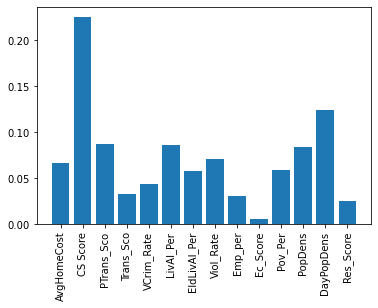

In [67]:
x = feature_names
y = random_forest.feature_importances_

plt.bar(x, y)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

## Linear Regression

In [115]:
from scipy.stats import linregress
import matplotlib.pyplot as plt